#### hyperparameter tuning

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
#import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import bz2
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

In [3]:
infile=bz2.BZ2File("dev_tfidfw2v","rb")
dev_tfidfw2v=pickle.load(infile)
infile.close()

In [19]:
infile=bz2.BZ2File("train_tfidfw2v","rb")
train_tfidfw2v=pickle.load(infile)
infile.close()

In [4]:
infile=bz2.BZ2File("ydev","rb")
ydev=pickle.load(infile)
infile.close()

In [20]:
infile=bz2.BZ2File("ytrain","rb")
ytrain=pickle.load(infile)
infile.close()

In [5]:
dev_tfidfw2v.shape

(17480, 401)

In [13]:
ydev[ydev==1].shape

(14833,)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [8]:
## when data is balanced
max_depth=[10,15,20,25,30,35]
min_samples_split=[5,50,100,150,200,250,300,350]
max_score=0
scoring=[]
best_parameters=()
for i in min_samples_split :
    for j in max_depth :
        tree=DecisionTreeClassifier(class_weight="balanced",max_depth=j,min_samples_split=i)
        tree.fit(dev_tfidfw2v,ydev)
        ydev_predictproba=tree.predict_proba(dev_tfidfw2v)[:,1]
        score=roc_auc_score(ydev,ydev_predictproba)
        scoring.append(score)
        print("parameters-"+"max_depth="+str(j)+" , min_samples_split="+str(i)+" score= "+str(score))
        if (score > max_score):
            max_score=score
            best_parameters=(j,i)
print("best_parameters are max_depth,min_sample_split= "+str(best_parameters))
        

parameters-max_depth=10 , min_samples_split=5 score= 0.8613842856590174
parameters-max_depth=15 , min_samples_split=5 score= 0.9553820215907867
parameters-max_depth=20 , min_samples_split=5 score= 0.985792203953289
parameters-max_depth=25 , min_samples_split=5 score= 0.9948036381676966
parameters-max_depth=30 , min_samples_split=5 score= 0.998450689557186
parameters-max_depth=35 , min_samples_split=5 score= 0.9994493154628137
parameters-max_depth=10 , min_samples_split=50 score= 0.8305712935331835
parameters-max_depth=15 , min_samples_split=50 score= 0.901437362667926
parameters-max_depth=20 , min_samples_split=50 score= 0.9333342137222441
parameters-max_depth=25 , min_samples_split=50 score= 0.9479412792991541
parameters-max_depth=30 , min_samples_split=50 score= 0.9546843919093091
parameters-max_depth=35 , min_samples_split=50 score= 0.9592879939156889
parameters-max_depth=10 , min_samples_split=100 score= 0.8103546903542732
parameters-max_depth=15 , min_samples_split=100 score= 0.86

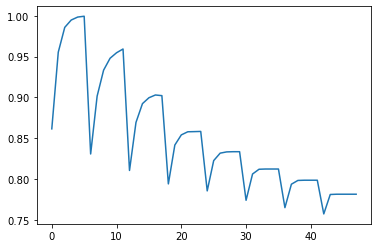

In [14]:

plt.plot(range(0,48),scoring)
plt.show()

In [24]:
## when data is balanced
max_depth=[40,45,50,55,60,65]
min_samples_split=[5,50,100,150,200,250,300,350]
max_score=0
scoring=[]
best_parameters=()
for i in min_samples_split :
    for j in max_depth :
        tree=DecisionTreeClassifier(class_weight="balanced",max_depth=j,min_samples_split=i)
        tree.fit(dev_tfidfw2v,ydev)
        ydev_predictproba=tree.predict_proba(dev_tfidfw2v)[:,1]
        score=roc_auc_score(ydev,ydev_predictproba)
        scoring.append(score)
        print("parameters-"+"max_depth="+str(j)+" , min_samples_split="+str(i)+" score= "+str(score))
        if (score > max_score):
            max_score=score
            best_parameters=(j,i)
print("best_parameters are max_depth,min_sample_split= "+str(best_parameters))
        

parameters-max_depth=40 , min_samples_split=5 score= 0.999800664499212
parameters-max_depth=45 , min_samples_split=5 score= 0.9999360847838462
parameters-max_depth=50 , min_samples_split=5 score= 0.9999602806218004
parameters-max_depth=55 , min_samples_split=5 score= 0.9999683925948409
parameters-max_depth=60 , min_samples_split=5 score= 0.9999635406925984
parameters-max_depth=65 , min_samples_split=5 score= 0.999964355710298
parameters-max_depth=40 , min_samples_split=50 score= 0.9606941796096784
parameters-max_depth=45 , min_samples_split=50 score= 0.96230604266093
parameters-max_depth=50 , min_samples_split=50 score= 0.9620932084294936
parameters-max_depth=55 , min_samples_split=50 score= 0.9623051894392757
parameters-max_depth=60 , min_samples_split=50 score= 0.9622931933975111
parameters-max_depth=65 , min_samples_split=50 score= 0.9622779118156453
parameters-max_depth=40 , min_samples_split=100 score= 0.9020900899680209
parameters-max_depth=45 , min_samples_split=100 score= 0.901

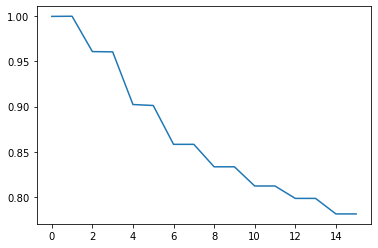

In [23]:

plt.plot(range(0,16),scoring)
plt.show()

In [21]:
## when data is not balanced
max_depth=[1,5,10,20,30,40,50,60,70]
max_depth_list=[]
min_samples_split=[5, 10, 100, 200,300,400,500]
min_samples_split_list=[]
scoring=[]
max_score=0
best_parameters=()
for i in max_depth :
    for j in min_samples_split :
        tree=DecisionTreeClassifier(max_depth=i,min_samples_split=j)
        tree.fit(dev_tfidfw2v,ydev)
        ydev_predictproba=tree.predict_proba(dev_tfidfw2v)[:,1]
        score=roc_auc_score(ydev,ydev_predictproba)
        max_depth_list.append(i)
        min_samples_split_list.append(j)
        scoring.append(score)
        print("parameters-"+"max_depth="+str(i)+" , min_samples_split="+str(j)+" score= "+str(score))
        if (score > max_score):
            max_score=score
            best_parameters=(i,j)
print("best_parameters are max_depth,min_sample_split= "+str(best_parameters))
        

parameters-max_depth=1 , min_samples_split=5 score= 0.5706168647384655
parameters-max_depth=1 , min_samples_split=10 score= 0.5706168647384655
parameters-max_depth=1 , min_samples_split=100 score= 0.5706168647384655
parameters-max_depth=1 , min_samples_split=200 score= 0.5706168647384655
parameters-max_depth=1 , min_samples_split=300 score= 0.5706168647384655
parameters-max_depth=1 , min_samples_split=400 score= 0.5706168647384655
parameters-max_depth=1 , min_samples_split=500 score= 0.5706168647384655
parameters-max_depth=5 , min_samples_split=5 score= 0.6870766285499018
parameters-max_depth=5 , min_samples_split=10 score= 0.6870766285499018
parameters-max_depth=5 , min_samples_split=100 score= 0.6865727183878767
parameters-max_depth=5 , min_samples_split=200 score= 0.6846575032019372
parameters-max_depth=5 , min_samples_split=300 score= 0.6828378233719621
parameters-max_depth=5 , min_samples_split=400 score= 0.6828378233719621
parameters-max_depth=5 , min_samples_split=500 score= 0.6

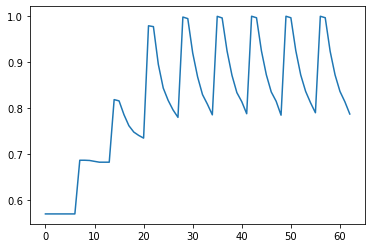

In [19]:
plt.plot(range(0,63),scoring)
plt.show()

In [24]:
max_depth_list


[1, 1, 1, 1, 5, 5, 5, 5, 10, 10, 10, 10, 50, 50, 50, 50]

In [25]:
min_samples_split_list


[5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500]

In [26]:
scoring

[0.5553702522258197,
 0.5553702522258197,
 0.5553702522258197,
 0.5553702522258197,
 0.65954272005688,
 0.65954272005688,
 0.6592212337783779,
 0.6548630285074598,
 0.7119021950234968,
 0.7097432768107522,
 0.6990850101919237,
 0.6865789838364416,
 0.9455576072211178,
 0.93801534428729,
 0.9161624147914913,
 0.867025023157327]

In [15]:
tree=DecisionTreeClassifier(class_weight="balanced")

In [26]:
parametrs_dict={'max_depth':[30,35,40,45,50,55,60],'min_samples_split':[5,50,100,150,200,250,300,350]}

In [27]:

rcv=RandomizedSearchCV(estimator=tree,param_distributions=parametrs_dict,scoring="roc_auc")

In [ ]:
rcv.fit(train_tfidf,ytrain)

In [ ]:
rcv.cv_results_

In [25]:
rcv_max_depth=50
rcv_min_samples_split=350